#### Example 4 - `stripy` gradients

SRFPACK is a Fortran 77 software package that constructs a smooth interpolatory or approximating surface to data values associated with arbitrarily distributed points. It employs automatically selected tension factors to preserve shape properties of the data and avoid overshoot and undershoot associated with steep gradients.

#### Notebook contents

   - [Analytic function and derivatives](#Analytic-function)
   - [Evaluating accuracy](#Derivatives-of-solution-compared-to-analytic-values)


The next example is [Ex5-Smoothing](./Ex5-Smoothing.ipynb)

### Define a computational mesh

Use the (usual) icosahedron with face points included. 

In [1]:
import stripy as stripy

xmin = 0.0
xmax = 10.0
ymin = 0.0
ymax = 10.0
extent = [xmin, xmax, ymin, ymax]

spacingX = 0.2
spacingY = 0.2

mesh = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=3)

print("number of points = {}".format(mesh.npoints))

number of points = 15496


### Analytic function 

Define a relatively smooth function that we can interpolate from the coarse mesh to the fine mesh and analyse 

In [2]:
import numpy as np

def analytic(xs, ys, k1, k2):
     return np.cos(k1*xs) * np.sin(k2*ys)

def analytic_ddx(xs, ys, k1, k2):
     return -k1 * np.sin(k1*xs) * np.sin(k2*ys) / np.cos(ys)

def analytic_ddy(xs, ys, k1, k2):
     return k2 * np.cos(k1*xs) * np.cos(k2*ys) 

analytic_sol = analytic(mesh.x, mesh.y, 0.1, 1.0)
analytic_sol_ddx = analytic_ddx(mesh.x, mesh.y, 0.1, 1.0)
analytic_sol_ddy = analytic_ddy(mesh.x, mesh.y, 0.1, 1.0)


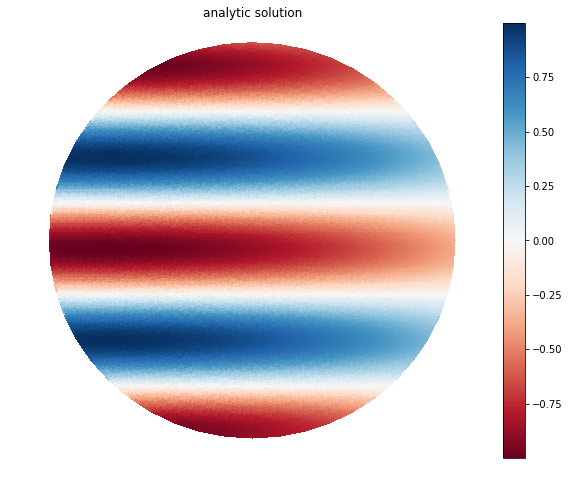

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def axis_mesh_field(fig, ax, mesh, field, label):

    ax.axis('off')

    x0 = mesh.x
    y0 = mesh.y
    
    trip = ax.tripcolor(x0, y0, mesh.simplices, field, cmap=plt.cm.RdBu)
    fig.colorbar(trip, ax=ax)
    
    ax.set_title(str(label))
    return

    
fig = plt.figure(figsize=(10, 8), facecolor="none")
ax = fig.add_subplot(111)
axis_mesh_field(fig, ax, mesh, analytic_sol, "analytic solution")

### Derivatives of solution compared to analytic values

The `gradient` method of `Triangulation` takes a data array f representing values on the mesh vertices and returns the x,y derivatives.

``` python
Triangulation.gradient(f, nit=3, tol=0.001)

```

Derivatives of higher accuracy can be obtained by tweaking `tol`, which controls the convergence tolerance, or `nit` which controls the number of iterations to a solution. The default values are set to an optimal trade-off between speed and accuracy.

In [4]:
stripy_ddx, stripy_ddy = mesh.gradient(analytic_sol)


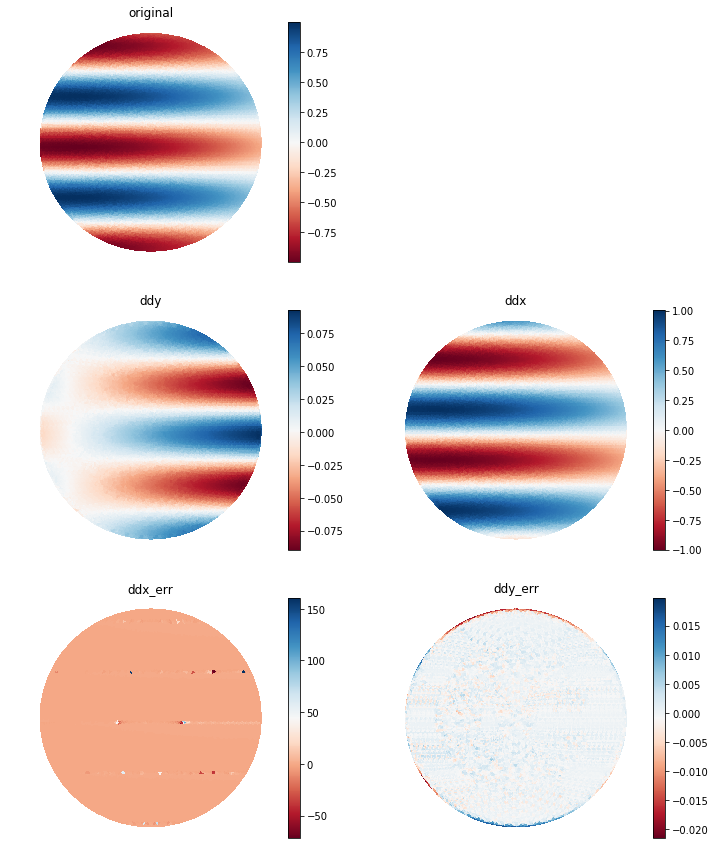

In [5]:
fig, ax = plt.subplots(3,2, figsize=(12, 15), facecolor="none")

axis_mesh_field(fig, ax[0,0], mesh, analytic_sol, label="original")
axis_mesh_field(fig, ax[1,0], mesh, stripy_ddx, label="ddy")
axis_mesh_field(fig, ax[1,1], mesh, stripy_ddy, label="ddx")
axis_mesh_field(fig, ax[2,0], mesh, stripy_ddx-analytic_sol_ddx, label="ddx_err")
axis_mesh_field(fig, ax[2,1], mesh, stripy_ddy-analytic_sol_ddy, label="ddy_err")

ax[0,1].axis('off')

plt.show()

The next example is [Ex5-Smoothing](./Ex5-Smoothing.ipynb)